# Exploratory Data Analysis: Hepatitis C Virus (HCV) in Egyptian Patients

The "Hepatitis C Virus (HCV) for Egyptian patients" dataset from the UCI Machine Learning Repository contains clinical and demographic data for Egyptian patients who underwent treatment for HCV over 18 months. It includes a variety of features, from basic demographics and symptoms to complex blood work results like liver enzyme levels and RNA measurements.

The target variable for our analysis is the **Baseline Histological Staging**, which represents the severity of liver fibrosis, graded from F1 to F4 (Cirrhosis).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd

file_path = "HCV-Egy-Data.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "nourmibrahim/hepatitis-c-virus-hcv-for-egyptian-patients",
  file_path,
)

print("First 5 rows of the dataset:")
display(df.head())

print(f"\nDataset shape: {df.shape}\n")
print("Dataset Information:")
df.info()



/home/adriano/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_12462/2960820252.py:7: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 rows of the dataset:


,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1



Dataset shape: (1385, 29)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               1385 non-null   int64  
 1   Gender                            1385 non-null   int64  
 2   BMI                               1385 non-null   int64  
 3   Fever                             1385 non-null   int64  
 4   Nausea/Vomting                    1385 non-null   int64  
 5   Headache                          1385 non-null   int64  
 6   Diarrhea                          1385 non-null   int64  
 7   Fatigue & generalized bone ache   1385 non-null   int64  
 8   Jaundice                          1385 non-null   int64  
 9   Epigastric pain                   1385 non-null   int64  
 10  WBC                               1385 non-null   int64  
 11  RBC                 

* **Dataset Size:** The dataset contains **1385 records (patients)** and **29 columns (features)**. This is a moderately sized dataset, sufficient for initial modeling.

* **Data Completeness:** All 29 columns have **1385 non-null values**. This means there are **no missing values** in the dataset, which significantly simplifies the data cleaning process.

* **Data Types:** All features are of a numerical data type (`int64` or `float64`). This indicates that categorical features like `Gender` and binary symptoms (`Fever`, `Jaundice`, etc.) have already been **numerically encoded** (e.g., as 1 and 2).

In [4]:

df.columns = df.columns.str.strip()

df['Gender'] = df['Gender'].map({1: 'Male', 2: 'Female'})

symptom_cols = [
    'Fever', 
    'Nausea/Vomting', 
    'Headache',
    'Diarrhea', 
    'Fatigue & generalized bone ache', 
    'Jaundice',
    'Epigastric pain'
]

for col in symptom_cols:
    df[col] = df[col].map({1: 'Absent', 2: 'Present'})
    
df['Fibrosis_Stage_Label'] = df['Baselinehistological staging'].map({
    1: 'F1 (Portal Fibrosis)',
    2: 'F2 (Few Septa)',
    3: 'F3 (Many Septa)',
    4: 'F4 (Cirrhosis)'
})

print("Data successfully decoded for categorical features.")


print("\nDescriptive Statistics for Numerical Features:")
display(df.describe().drop(columns=['Baselinehistological staging']).T.style.background_gradient(cmap='viridis'))

Data successfully decoded for categorical features.

Descriptive Statistics for Numerical Features:


,count,mean,std,min,25%,50%,75%,max
Age,1385.000000,46.319134,8.781506,32.000000,39.000000,46.000000,54.000000,61.000000
BMI,1385.000000,28.608664,4.076215,22.000000,25.000000,29.000000,32.000000,35.000000
WBC,1385.000000,7533.386282,2668.220333,2991.000000,5219.000000,7498.000000,9902.000000,12101.000000
RBC,1385.000000,4422129.610830,346357.711599,3816422.000000,4121374.000000,4438465.000000,4721279.000000,5018451.000000
HGB,1385.000000,12.587726,1.713511,10.000000,11.000000,13.000000,14.000000,15.000000
Plat,1385.000000,158348.060650,38794.785550,93013.000000,124479.000000,157916.000000,190314.000000,226464.000000
AST 1,1385.000000,82.774729,25.993242,39.000000,60.000000,83.000000,105.000000,128.000000
ALT 1,1385.000000,83.916245,25.922800,39.000000,62.000000,83.000000,106.000000,128.000000
ALT4,1385.000000,83.405776,26.529730,39.000000,61.000000,82.000000,107.000000,128.000000
ALT 12,1385.000000,83.510469,26.064478,39.000000,60.000000,84.000000,106.000000,128.000000


In [5]:
fig = px.pie(
    df, 
    names='Fibrosis_Stage_Label', 
    title='Distribution of Liver Fibrosis Stages (Target Variable)',
    hole=0.3,
    color_discrete_sequence=px.colors.sequential.Plasma_r
)

fig.update_traces(
    textposition='inside', 
    textinfo='percent+label',
    hovertemplate='Stage: %{label}<br>Count: %{value}<br>Percentage: %{percent}'
)
fig.update_layout(showlegend=False)
fig.show()

In the chart we can see that the target variable is **well-balanced**, with each of the four fibrosis stages representing about 25% of the data.

In [6]:
print(df.columns)

Index(['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache',
       'Diarrhea', 'Fatigue & generalized bone ache', 'Jaundice',
       'Epigastric pain', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading', 'Baselinehistological staging',
       'Fibrosis_Stage_Label'],
      dtype='object')


In [8]:
fig = make_subplots(
    rows=1, cols=3,
    specs=[[{'type':'xy'}, {'type':'xy'}, {'type':'domain'}]],
    subplot_titles=('Age Distribution', 'BMI Distribution', 'Gender Distribution')
)

fig.add_trace(go.Histogram(x=df['Age'], name='Age', marker_color='#636EFA'), row=1, col=1)

fig.add_trace(go.Histogram(x=df['BMI'], name='BMI', marker_color='#EF553B'), row=1, col=2)

gender_counts = df['Gender'].value_counts()
fig.add_trace(go.Pie(labels=gender_counts.index, values=gender_counts.values, name='Gender', hole=0.3), row=1, col=3)

fig.update_layout(title_text='Patient Demographics Analysis', showlegend=False)
fig.show()

The patient cohort is well-distributed without significant skews.

* **Age & BMI:** Both show a relatively **uniform distribution** across their respective ranges (Age: 32-61, BMI: 22-35). This means the dataset isn't biased towards a specific age or weight group.
* **Gender:** The gender split is **perfectly balanced** at nearly 50/50.


In [ ]:
# Symptom Prevalence Analysis
symptom_df = df[symptom_cols].apply(lambda x: x.value_counts()).T.loc[:, 'Present'].sort_values(ascending=False)
fig2 = px.bar(
    symptom_df,
    x=symptom_df.index,
    y=symptom_df.values,
    title='Prevalence of Symptoms Among Patients',
    labels={'x': 'Symptom', 'y': 'Number of Patients Presenting Symptom'},
    color=symptom_df.values,
    color_continuous_scale='sunset'
)
fig2.show()


### Symptom Prevalence

Each symptom is present in roughly half the patients (~700 out of 1385).
Because no single symptom stands out, they are likely **weak individual predictors**. They don't create clear subgroups within the data.

In [ ]:
continuous_features = ['Age', 'BMI', 'RNA Base', 'WBC', 'RBC', 'Plat']

fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=continuous_features
)

for i, feature in enumerate(continuous_features):
    row, col = (i // 3) + 1, (i % 3) + 1

    fig.add_trace(
        go.Box(
            y=df[feature], 
            x=df['Fibrosis_Stage_Label'], 
            name=feature,
            marker_color=px.colors.qualitative.Vivid[i]
        ),
        row=row, col=col
    )

fig.update_layout(
    title_text='Continuous Features vs. Liver Fibrosis Stage',
    showlegend=False, 
    height=700 
)

fig.show()


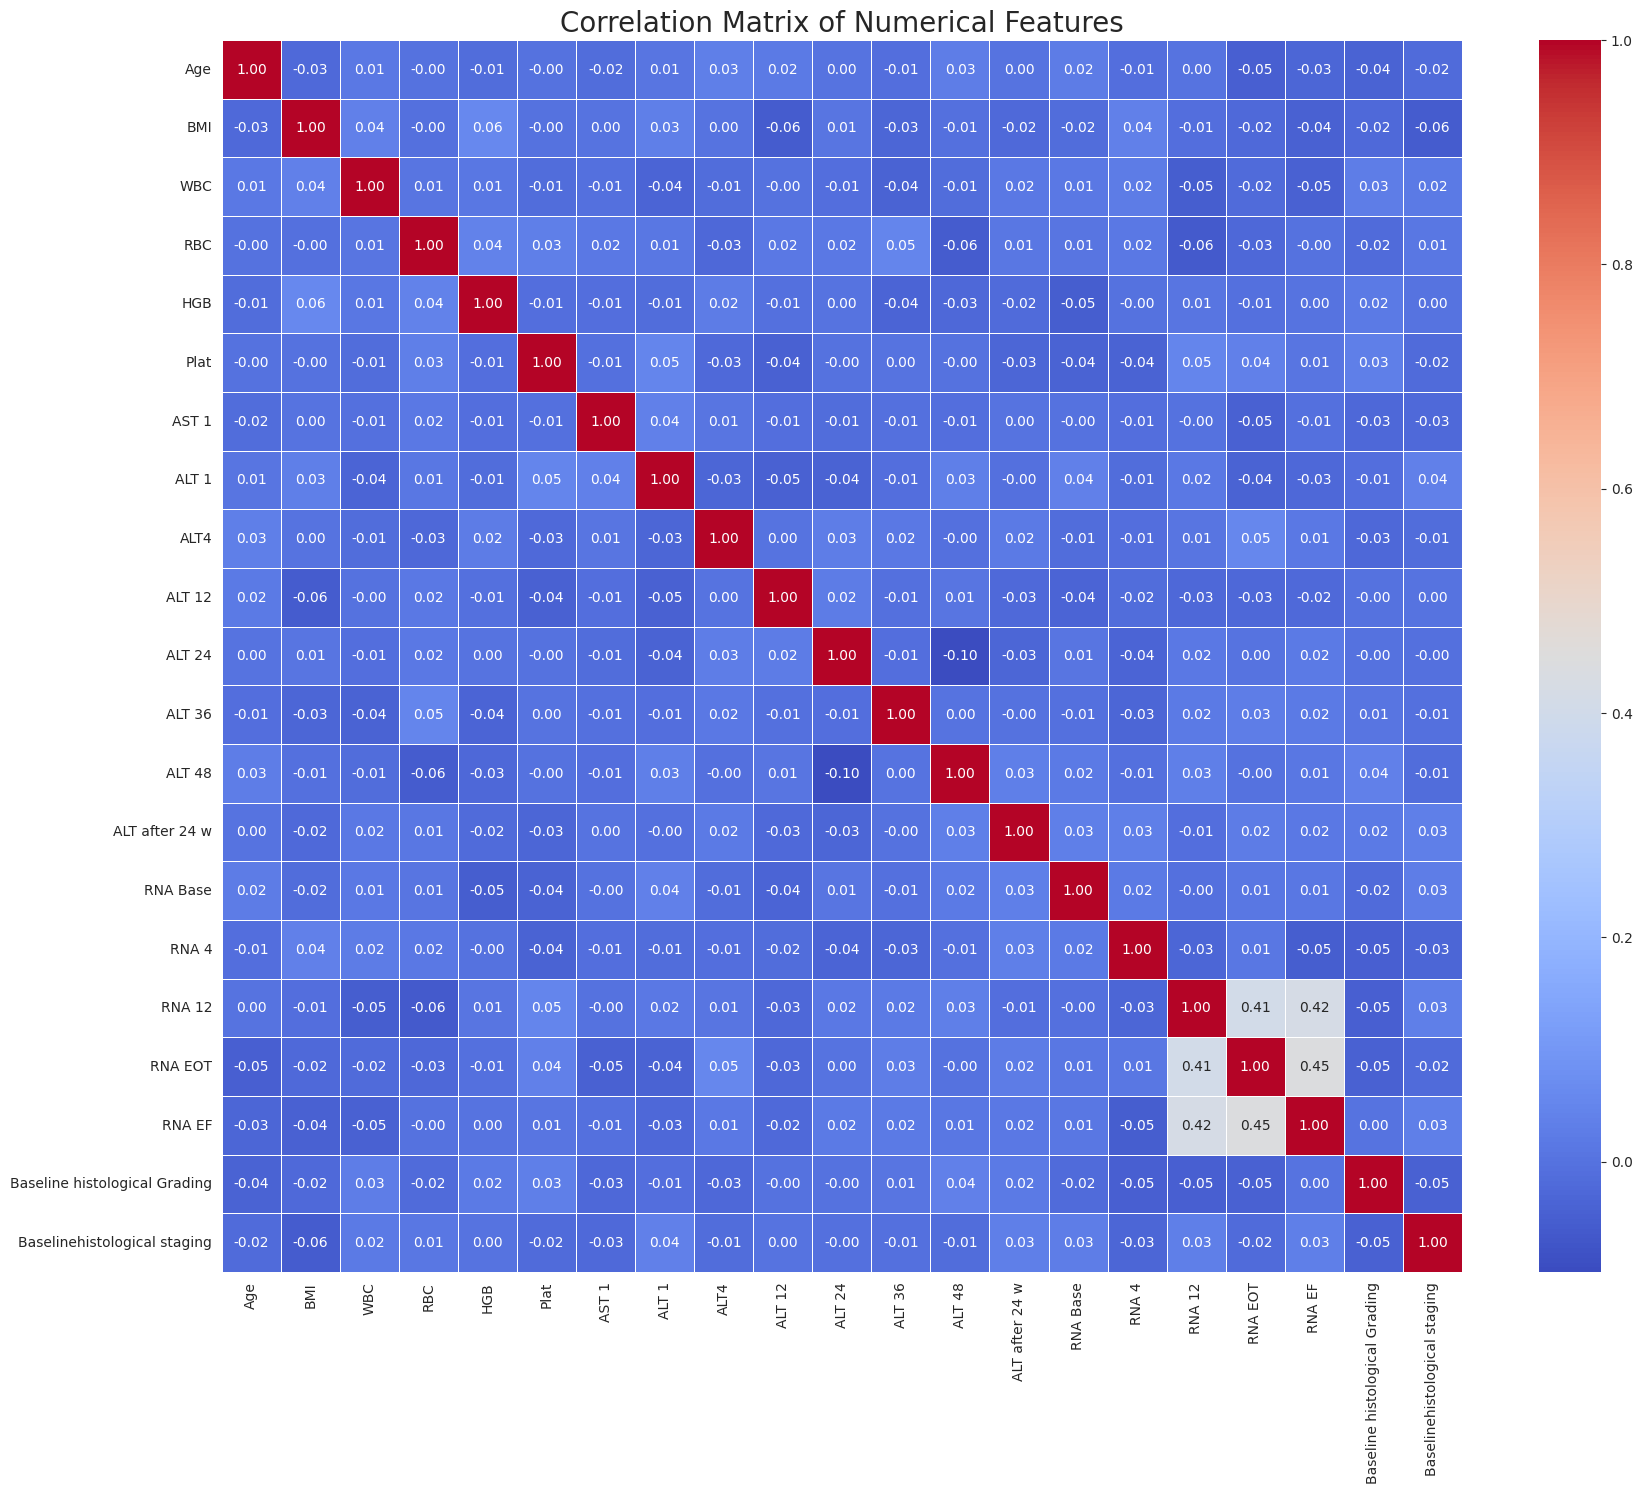

In [ ]:
numerical_df = df.select_dtypes(include=np.number)

corr_matrix = numerical_df.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt='.2f', 
    cmap='coolwarm', 
    linewidths=0.5
)
plt.title('Correlation Matrix of Numerical Features', fontsize=20)
plt.show()


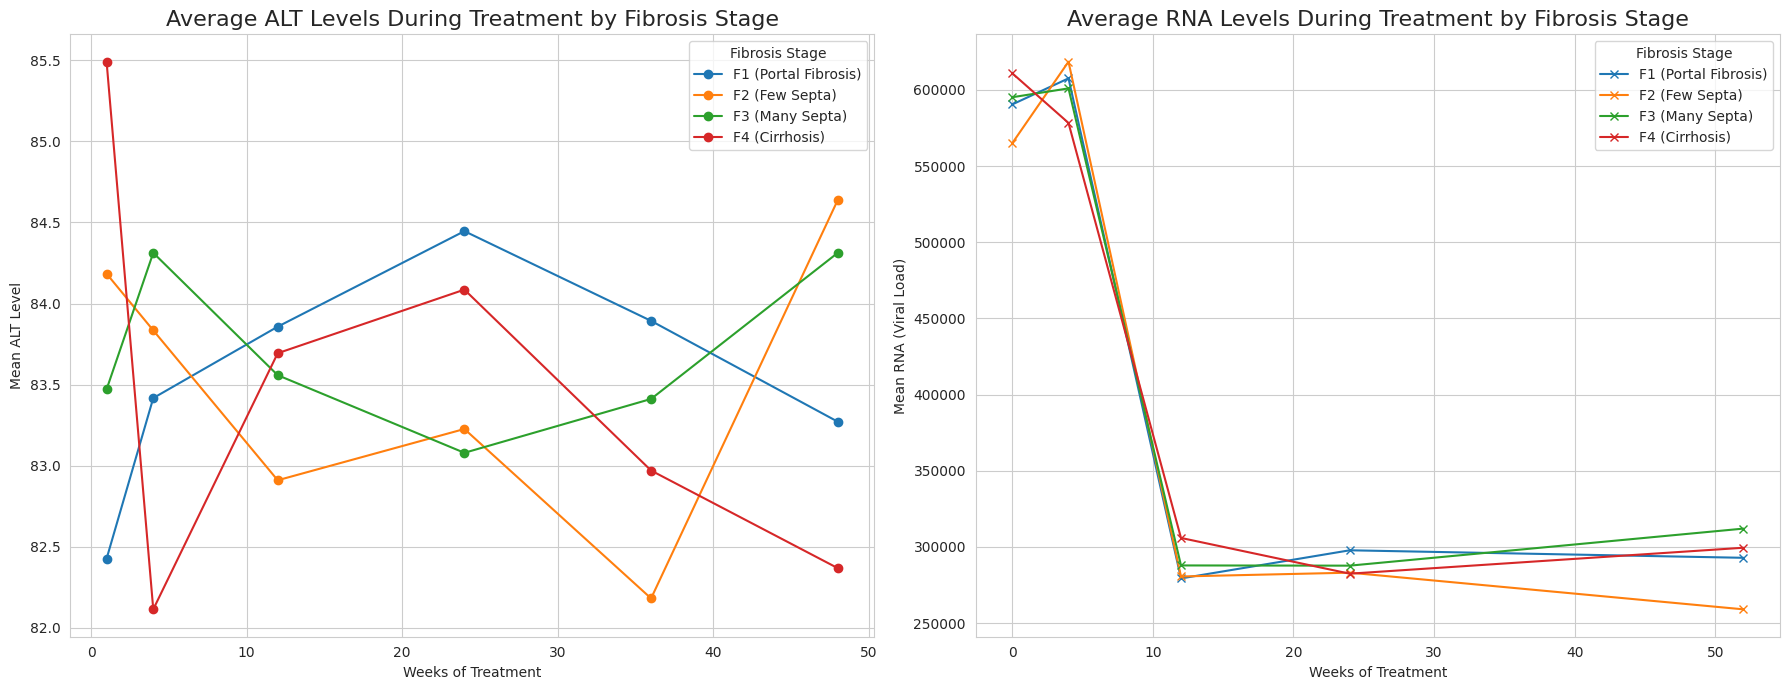

In [ ]:
alt_cols = ['ALT 1', 'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48']
alt_df = df.groupby('Fibrosis_Stage_Label')[alt_cols].mean().T
alt_df.index = [1, 4, 12, 24, 36, 48] # Set index to weeks for plotting

rna_cols = ['RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF']
rna_df = df.groupby('Fibrosis_Stage_Label')[rna_cols].mean().T
rna_df.index = [0, 4, 12, 24, 52] # Rough week mapping: EOT~24w, EF~52w

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

alt_df.plot(kind='line', marker='o', ax=ax1)
ax1.set_title('Average ALT Levels During Treatment by Fibrosis Stage', fontsize=16)
ax1.set_xlabel('Weeks of Treatment')
ax1.set_ylabel('Mean ALT Level')
ax1.legend(title='Fibrosis Stage')
ax1.grid(True)
    
rna_df.plot(kind='line', marker='x', ax=ax2)
ax2.set_title('Average RNA Levels During Treatment by Fibrosis Stage', fontsize=16)
ax2.set_xlabel('Weeks of Treatment')
ax2.set_ylabel('Mean RNA (Viral Load)')
ax2.legend(title='Fibrosis Stage')
ax2.grid(True)

plt.tight_layout()
plt.show()

## Part 2: Creation of Imbalanced Datasets for Comparative Analysis

The initial EDA revealed that the publicly available HCV dataset is remarkably **well-balanced**, with each of the four fibrosis stages (F1-F4) representing approximately 25% of the cohort. While this is convenient for standard modeling, our primary research goal is to evaluate how synthetic data generation algorithms perform under the stress of **class imbalance**, a condition far more typical in real-world medical datasets where advanced disease stages are often rare.

To achieve this, we will systematically engineer a series of datasets derived from the original data. Each new dataset will feature a controlled, escalating **Imbalance Ratio (IR)**, defined as the ratio of the number of samples in the majority class to the number of samples in a minority class.

### Methodology

Our approach is designed to isolate the effect of the Imbalance Ratio itself:

1.  **Baseline (IR=1):** The original, balanced dataset of 1385 patients will serve as our baseline control group.
2.  **Majority Class Designation:** We will designate the most severe stage, **`F4 (Cirrhosis)`**, as the single majority class. This is a clinically relevant scenario, as we want to test the algorithms' ability to generate plausible data for the less severe (and now, artificially rarer) stages. The number of F4 samples will remain constant across all generated datasets.
3.  **Minority Class Undersampling:** The other three stages, **`F1`**, **`F2`**, and **`F3`**, will be treated as minority classes. To achieve a target Imbalance Ratio (e.g., IR=10), we will randomly undersample these three classes so that each has approximately 1/10th the number of samples as the F4 class.
4.  **Controlled Escalation:** We will generate datasets with the following target Imbalance Ratios: **IR = 2, 5, 10, and 20**.
5.  **Reproducibility:** A fixed `random_state` will be used throughout the sampling process to ensure that our results are fully reproducible.

This systematic process will yield a collection of datasets where the only significant variable changing is the class distribution, allowing for a rigorous and unbiased comparison of synthetic data generation techniques in the subsequent stages of our research.
becomes more severe.

In [ ]:
from sklearn.utils import resample
import warnings
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def create_imbalanced_dataset(df_source, target_column, minority_class_label, n_minority_samples, random_state=42):
    df_minority = df_source[df_source[target_column] == minority_class_label]
    df_majority = df_source[df_source[target_column] != minority_class_label]

    df_minority_downsampled = resample(
        df_minority,
        replace=False,  # Sample without replacement
        n_samples=n_minority_samples,
        random_state=random_state
    )

    df_imbalanced = pd.concat([df_majority, df_minority_downsampled])

    df_imbalanced = df_imbalanced.sample(frac=1, random_state=random_state).reset_index(drop=True)
    
    return df_imbalanced

In [ ]:
TARGET_VARIABLE = 'Fibrosis_Stage_Label'
MINORITY_CLASS = 'F4 (Cirrhosis)'
TARGET_IRS = [1, 2, 5, 10, 20, 50] 

imbalanced_datasets = {}

imbalanced_datasets[1] = df.copy() 

In [ ]:
majority_counts = df[df[TARGET_VARIABLE] != MINORITY_CLASS][TARGET_VARIABLE].value_counts()
n_majority_reference = majority_counts.max()
print(f"Reference Majority Class Size (for F3): {n_majority_reference} samples.\n")

Reference Majority Class Size (for F3): 355 samples.



In [ ]:
# 3. Generate datasets for each target IR > 1
for ir in TARGET_IRS[1:]:
    n_minority = max(1, int(n_majority_reference / ir))
    print(f"Generating dataset for Target IR={ir} with {n_minority} samples for '{MINORITY_CLASS}'...")
    
    df_new = create_imbalanced_dataset(df, TARGET_VARIABLE, MINORITY_CLASS, n_minority)
    imbalanced_datasets[ir] = df_new

print("\n Dataset Generation Complete ")

Generating dataset for Target IR=2 with 177 samples for 'F4 (Cirrhosis)'...
Generating dataset for Target IR=5 with 71 samples for 'F4 (Cirrhosis)'...
Generating dataset for Target IR=10 with 35 samples for 'F4 (Cirrhosis)'...
Generating dataset for Target IR=20 with 17 samples for 'F4 (Cirrhosis)'...
Generating dataset for Target IR=50 with 7 samples for 'F4 (Cirrhosis)'...

 Dataset Generation Complete 


In [ ]:
n_datasets = len(TARGET_IRS)
fig = make_subplots(
    rows=2, cols=3,
    specs=[[{'type':'domain'}]*3, [{'type':'domain'}]*3],
    subplot_titles=[f"<b>IR ≈ {ir}</b>" for ir in TARGET_IRS]
)

for i, ir in enumerate(TARGET_IRS):
    row, col = (i // 3) + 1, (i % 3) + 1
    
    temp_df = imbalanced_datasets[ir]
    class_counts = temp_df[TARGET_VARIABLE].value_counts()
    
    # Calculate the actual IR
    actual_ir = class_counts.max() / class_counts.min() if class_counts.min() > 0 else float('inf')
    
    fig.add_trace(go.Pie(
        labels=class_counts.index, 
        values=class_counts.values, 
        name=f'IR={ir}'
    ), row=row, col=col)
    
    fig.layout.annotations[i]['text'] = (
        f"<b>Target IR: {ir}</b><br>"
        f"Actual IR: {actual_ir:.1f}<br>"
        f"Total Samples: {len(temp_df)}"
    )

fig.update_traces(
    hole=.4, 
    hoverinfo="label+percent+value",
    textinfo='percent',
    textfont_size=12
)
fig.update_layout(
    title_text="<b>Class Distribution Across Systematically Generated Imbalanced Datasets</b>",
    height=700,
    showlegend=False,
    font=dict(family="Arial, sans-serif", size=12)
)
fig.show()

In [ ]:

print("\nHead of the most imbalanced dataset (IR=50):")
display(imbalanced_datasets[50].head())
print("\nClass counts for the most imbalanced dataset (IR=50):")
print(imbalanced_datasets[50][TARGET_VARIABLE].value_counts())


Head of the most imbalanced dataset (IR=50):


,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging,Fibrosis_Stage_Label
0,58,Female,33,Absent,Present,Present,Present,Absent,Present,Present,...,111,33,1047535,320353,349454,546832,643942,13,1,F1 (Portal Fibrosis)
1,61,Male,27,Present,Present,Present,Present,Present,Present,Present,...,114,32,545563,548039,5,5,5,12,2,F2 (Few Septa)
2,39,Female,34,Absent,Present,Present,Present,Absent,Present,Present,...,106,42,1073102,1180076,78174,557747,436184,13,3,F3 (Many Septa)
3,57,Female,33,Absent,Absent,Present,Present,Present,Absent,Present,...,115,30,1200762,508679,223044,13136,222911,12,1,F1 (Portal Fibrosis)
4,60,Female,33,Present,Absent,Absent,Absent,Present,Present,Absent,...,82,25,637799,165478,27132,110338,431734,9,1,F1 (Portal Fibrosis)



Class counts for the most imbalanced dataset (IR=50):
Fibrosis_Stage_Label
F3 (Many Septa)         355
F1 (Portal Fibrosis)    336
F2 (Few Septa)          332
F4 (Cirrhosis)            7
Name: count, dtype: int64


In [ ]:
import os
output_dir = '../Imbalanced_Datasets/Hepatitis_C_Virus/'

os.makedirs(output_dir, exist_ok=True)

print(f"Directory '{output_dir}' is ready.")

for ir, df_to_save in imbalanced_datasets.items():
    filename = f"hcv_dataset_ir_{ir}.csv"
    full_path = os.path.join(output_dir, filename)

    df_to_save.to_csv(full_path, index=False)
    
    print(f"Successfully saved: {full_path}")

print("\n All datasets have been saved. ")

Directory '../Imbalanced_Datasets/Hepatitis_C_Virus/' is ready.
Successfully saved: ../Imbalanced_Datasets/Hepatitis_C_Virus/hcv_dataset_ir_1.csv
Successfully saved: ../Imbalanced_Datasets/Hepatitis_C_Virus/hcv_dataset_ir_2.csv
Successfully saved: ../Imbalanced_Datasets/Hepatitis_C_Virus/hcv_dataset_ir_5.csv
Successfully saved: ../Imbalanced_Datasets/Hepatitis_C_Virus/hcv_dataset_ir_10.csv
Successfully saved: ../Imbalanced_Datasets/Hepatitis_C_Virus/hcv_dataset_ir_20.csv
Successfully saved: ../Imbalanced_Datasets/Hepatitis_C_Virus/hcv_dataset_ir_50.csv

 All datasets have been saved. 
